# Part 1: EDA(Exploratory Data Analysis)

In [ ]:
# install the spacy library for processing text data, as it is built-in  in google colab
!pip install -U spacy

In [ ]:
#To load english grammer & Vocab package
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 56.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# to display the text graphically
!pip install wordcloud

In [ ]:
#Natural Language toolkit
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import string
import spacy  #language model
import matplotlib.pyplot as plt
from wordcloud import wordcloud   #to create wordcloud
import seaborn as sns
%matplotlib inline

In [ ]:
#Loading the English Grammer & Vocab package in nlp object
nlp = spacy.load('en_core_web_md')

Loading the dataset

In [ ]:
df = pd.read_excel('/content/dataset.xlsx')
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [ ]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [ ]:
# Checking the value counts oh the rating column
df['rating'].value_counts()

,count
rating,
5,419
1,386
4,310
3,199
2,126


In [ ]:
print("\nSummary Statistics:\n", df.describe(include='all'))



Summary Statistics:
                   title       rating  \
count              1440  1440.000000   
unique             1351          NaN   
top     Value for money          NaN   
freq                 16          NaN   
mean                NaN     3.173611   
std                 NaN     1.584453   
min                 NaN     1.000000   
25%                 NaN     1.000000   
50%                 NaN     4.000000   
75%                 NaN     5.000000   
max                 NaN     5.000000   

                                                     body  
count                                                1440  
unique                                               1440  
top     Good phone for budget buyers. Sound quality is...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%              

Checking Missing/Null values

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 title     0
rating    0
body      0
dtype: int64


In [ ]:
# Data types and unique values
print("\nData Types:\n", df.dtypes)
print("\nUnique Values:\n", df.nunique())




Data Types:
 title     object
rating     int64
body      object
dtype: object

Unique Values:
 title     1351
rating       5
body      1440
dtype: int64


Data Cleaning

In [ ]:
df = [body.strip() for body in df.body]  # remove both the leading and the trailing spaces
df = [body for body in df if body]    # remove empty strings,because they are considered in python as false
df[0:5]  # Display all the comments as list elements

['Very disappointed with the overall performance from Samsung',
 'Camera quality is low',
 "Got the mobile on the launch date,Battery must be appreciatedCamera is just averageMobile performance is above average90hz refresh rate? If u r buying the mobile for this feature then I'm afraid u may get disappointed, it's just normal.The USB cable is too small in lengthIt's a good mobile in this budget, there are no returns for this,  only replacement is available, hence choose wisely before buying",
 "1. It doesn't work with 5.0GHz WiFi frequency. 2.4GHz is very old school.2. Camera quality is pathetic (both front and back). Forget about 48MP, pictures are all blur, poorer than a 4MP one.3. Amazon didn't allow to write a review until they sold most of the stock, something very fishy.4. No return policy, you will have to live with the phone you didn't like. Now you decide.",
 "Not worth buying....faulty software, poor display quality, single band wifi doesn't support  5ghz WIFI band. Gyro sens

In [ ]:
# Joining the list into one string/text
body = ' '.join(df)
body

'Very disappointed with the overall performance from Samsung Camera quality is low Got the mobile on the launch date,Battery must be appreciatedCamera is just averageMobile performance is above average90hz refresh rate? If u r buying the mobile for this feature then I\'m afraid u may get disappointed, it\'s just normal.The USB cable is too small in lengthIt\'s a good mobile in this budget, there are no returns for this,  only replacement is available, hence choose wisely before buying 1. It doesn\'t work with 5.0GHz WiFi frequency. 2.4GHz is very old school.2. Camera quality is pathetic (both front and back). Forget about 48MP, pictures are all blur, poorer than a 4MP one.3. Amazon didn\'t allow to write a review until they sold most of the stock, something very fishy.4. No return policy, you will have to live with the phone you didn\'t like. Now you decide. Not worth buying....faulty software, poor display quality, single band wifi doesn\'t support  5ghz WIFI band. Gyro sensor missing

In [ ]:
# Punctuation (it replace only the dots it does not replace any space)
no_punc_body = body.translate(str.maketrans('','', string.punctuation))
#with arguments (x,y,z)where 'x','y',and 'z'
#must be equal-length string and characters in 'x' are replaced by characters i 'y'
#'z' is a string (string.punctuation here)
no_punc_body

'Very disappointed with the overall performance from Samsung Camera quality is low Got the mobile on the launch dateBattery must be appreciatedCamera is just averageMobile performance is above average90hz refresh rate If u r buying the mobile for this feature then Im afraid u may get disappointed its just normalThe USB cable is too small in lengthIts a good mobile in this budget there are no returns for this  only replacement is available hence choose wisely before buying 1 It doesnt work with 50GHz WiFi frequency 24GHz is very old school2 Camera quality is pathetic both front and back Forget about 48MP pictures are all blur poorer than a 4MP one3 Amazon didnt allow to write a review until they sold most of the stock something very fishy4 No return policy you will have to live with the phone you didnt like Now you decide Not worth buyingfaulty software poor display quality single band wifi doesnt support  5ghz WIFI band Gyro sensor missing and many more DONT GO BY PAID REVIEWS IN YOU T

In [ ]:
import nltk # Natural Language Tool Kit
# it is used for sentiment analysis, especially during text preprocessing.
# it helps with tokenization, which is a key step before building any NLP model, including sentiment analysis.
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#  Tokenization-break the sentence into s single word is called tokenize
from nltk.tokenize import word_tokenize
body_tokens = word_tokenize(no_punc_body)
print(body_tokens)

['Very', 'disappointed', 'with', 'the', 'overall', 'performance', 'from', 'Samsung', 'Camera', 'quality', 'is', 'low', 'Got', 'the', 'mobile', 'on', 'the', 'launch', 'dateBattery', 'must', 'be', 'appreciatedCamera', 'is', 'just', 'averageMobile', 'performance', 'is', 'above', 'average90hz', 'refresh', 'rate', 'If', 'u', 'r', 'buying', 'the', 'mobile', 'for', 'this', 'feature', 'then', 'Im', 'afraid', 'u', 'may', 'get', 'disappointed', 'its', 'just', 'normalThe', 'USB', 'cable', 'is', 'too', 'small', 'in', 'lengthIts', 'a', 'good', 'mobile', 'in', 'this', 'budget', 'there', 'are', 'no', 'returns', 'for', 'this', 'only', 'replacement', 'is', 'available', 'hence', 'choose', 'wisely', 'before', 'buying', '1', 'It', 'doesnt', 'work', 'with', '50GHz', 'WiFi', 'frequency', '24GHz', 'is', 'very', 'old', 'school2', 'Camera', 'quality', 'is', 'pathetic', 'both', 'front', 'and', 'back', 'Forget', 'about', '48MP', 'pictures', 'are', 'all', 'blur', 'poorer', 'than', 'a', '4MP', 'one3', 'Amazon', 'd

In [ ]:
#Normalize the data
# it is an essential part of our preprocessing pipeline in sentiment analysis.
lower_words = [body.lower() for body in body_tokens]
print(lower_words)

['very', 'disappointed', 'with', 'the', 'overall', 'performance', 'from', 'samsung', 'camera', 'quality', 'is', 'low', 'got', 'the', 'mobile', 'on', 'the', 'launch', 'datebattery', 'must', 'be', 'appreciatedcamera', 'is', 'just', 'averagemobile', 'performance', 'is', 'above', 'average90hz', 'refresh', 'rate', 'if', 'u', 'r', 'buying', 'the', 'mobile', 'for', 'this', 'feature', 'then', 'im', 'afraid', 'u', 'may', 'get', 'disappointed', 'its', 'just', 'normalthe', 'usb', 'cable', 'is', 'too', 'small', 'in', 'lengthits', 'a', 'good', 'mobile', 'in', 'this', 'budget', 'there', 'are', 'no', 'returns', 'for', 'this', 'only', 'replacement', 'is', 'available', 'hence', 'choose', 'wisely', 'before', 'buying', '1', 'it', 'doesnt', 'work', 'with', '50ghz', 'wifi', 'frequency', '24ghz', 'is', 'very', 'old', 'school2', 'camera', 'quality', 'is', 'pathetic', 'both', 'front', 'and', 'back', 'forget', 'about', '48mp', 'pictures', 'are', 'all', 'blur', 'poorer', 'than', 'a', '4mp', 'one3', 'amazon', 'd

In [ ]:
#Remove the stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords are those words that do not carry any independent meaning like of are in etc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
my_stop_words = stopwords.words('english')
my_stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
'''
In case if we wish to remove additional words from the text other than the stopwords
then we can append those additional words to the my_stop_words objects
'''
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['disappointed', 'overall', 'performance', 'samsung', 'camera', 'quality', 'low', 'got', 'mobile', 'launch', 'datebattery', 'must', 'appreciatedcamera', 'averagemobile', 'performance', 'average90hz', 'refresh', 'rate', 'u', 'r', 'buying', 'mobile', 'feature', 'im', 'afraid', 'u', 'may', 'get', 'disappointed', 'normalthe', 'usb', 'cable', 'small', 'lengthits', 'good', 'mobile', 'budget', 'returns', 'replacement', 'available']


In [ ]:
# length of the token list after stopwords are removed
len(no_stop_tokens)

45034

Stemming:

It is important for sentiment analysis, especially during text preprocessing in traditional machine learning models (e.g., Logistic Regression, Naive Bayes, SVM)


*   Reduces Vocabulary size
*   Improves model generalization
*   Boosts performance for classical ML






In [ ]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens)

['disappoint', 'overal', 'perform', 'samsung', 'camera', 'qualiti', 'low', 'got', 'mobil', 'launch', 'datebatteri', 'must', 'appreciatedcamera', 'averagemobil', 'perform', 'average90hz', 'refresh', 'rate', 'u', 'r', 'buy', 'mobil', 'featur', 'im', 'afraid', 'u', 'may', 'get', 'disappoint', 'normalth', 'usb', 'cabl', 'small', 'lengthit', 'good', 'mobil', 'budget', 'return', 'replac', 'avail', 'henc', 'choos', 'wise', 'buy', '1', 'doesnt', 'work', '50ghz', 'wifi', 'frequenc', '24ghz', 'old', 'school2', 'camera', 'qualiti', 'pathet', 'front', 'back', 'forget', '48mp', 'pictur', 'blur', 'poorer', '4mp', 'one3', 'amazon', 'didnt', 'allow', 'write', 'review', 'sold', 'stock', 'someth', 'fishy4', 'return', 'polici', 'live', 'phone', 'didnt', 'like', 'decid', 'worth', 'buyingfaulti', 'softwar', 'poor', 'display', 'qualiti', 'singl', 'band', 'wifi', 'doesnt', 'support', '5ghz', 'wifi', 'band', 'gyro', 'sensor', 'miss', 'mani', 'dont', 'go', 'paid', 'review', 'tube', 'never', 'purchas', 'samsung

In [ ]:
# This code is used to check how stemming transforms each word in your cleaned (no-stopwords) review tokens.
for w in no_stop_tokens:
  print(w, ":", ps.stem(w))

Streaming output truncated to the last 5000 lines.
months : month
son : son
till : till
today : today
son : son
happy : happi
satisfied : satisfi
phone : phone
purchase : purchas
worthy : worthi
vll : vll
recommend : recommend
budget : budget
lies : lie
1000015000 : 1000015000
go : go
phone : phone
battery : batteri
life : life
normal : normal
camera : camera
quality : qualiti
poor : poor
also : also
screen : screen
touch : touch
much : much
good : good
highly : highli
recommend : recommend
buy : buy
product : product
mobile : mobil
hanged : hang
within : within
week : week
buying : buy
satisfied : satisfi
hope : hope
review : review
helpful : help
media : media
could : could
loaded : load
thank : thank
samsung : samsung
first : first
mobile : mobil
soon : soon
good : good
fetcher : fetcher
opening : open
camera : camera
need : need
much : much
better : better
wise : wise
mobile : mobil
good : good
thanks : thank
samsung : samsung
dont : dont
buy : buy
phone : phone
many : mani
manufac

Lammination

In [ ]:
#NLP english language model of spacy library
nlp=spacy.load('en_core_web_md')

In [ ]:
# lemmas being one of them but mostly POS(Part of speech) which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc)

disappoint overal perform samsung camera qualiti low got mobil launch datebatteri must appreciatedcamera averagemobil perform average90hz refresh rate u r buy mobil featur im afraid u may get disappoint normalth usb cabl small lengthit good mobil budget return replac avail henc choos wise buy 1 doesnt work 50ghz wifi frequenc 24ghz old school2 camera qualiti pathet front back forget 48mp pictur blur poorer 4mp one3 amazon didnt allow write review sold stock someth fishy4 return polici live phone didnt like decid worth buyingfaulti softwar poor display qualiti singl band wifi doesnt support 5ghz wifi band gyro sensor miss mani dont go paid review tube never purchas samsung phone phone lag much slow wast hard earn money worst samsung mobil seen samsung sceen qualiti color trash even old 5000 rs phone beat qualiti pleas never ever buy product मोबाइल का कैमरा बिल्कुल भी सही नही है 48 pm बताया और क्लियरिटी 5 मेगा पिक्सल का भी नही है ।मोबाइल भी पुराना सा दिखता है ।इसको नही खरीदे phone hang l

In [ ]:
## Lemmatization
doc = nlp(u'I love coding and writing')
for word in doc:
  print(word.text, "=>", word.lemma_)

I => I
love => love
coding => code
and => and
writing => writing


Visualization

In [ ]:
# 1st we need to check df is python list or pandas dataframe.if it is python list that we getting error in visualization part
# if it is pandas dataframe we don't getting any error in visualization.
print(type(df))

<class 'list'>


In [ ]:
import pandas as pd

df = pd.read_excel("/content/dataset.xlsx")

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

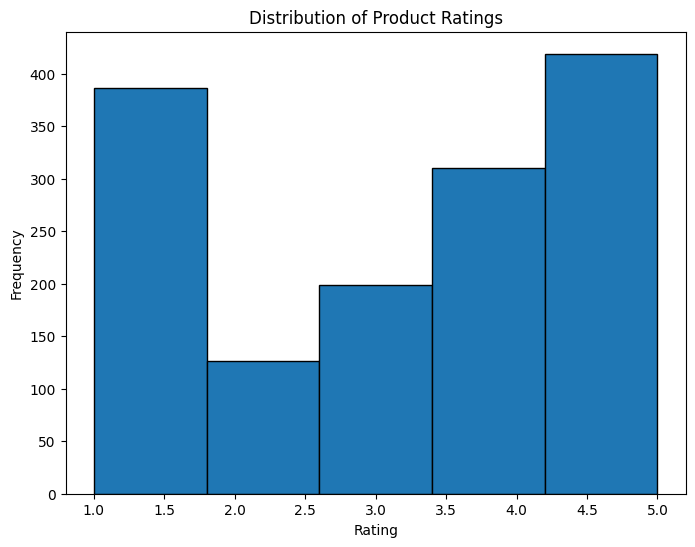

In [ ]:
# 1. Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

In [ ]:
# This code is used to convert numerical ratings (like 1 to 5) into text sentiment labels like:

def map_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["Sentiment"] = df["rating"].apply(map_sentiment)
df["Sentiment"].value_counts()

,count
Sentiment,
Positive,729
Negative,512
Neutral,199


/tmp/ipython-input-36-608654973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


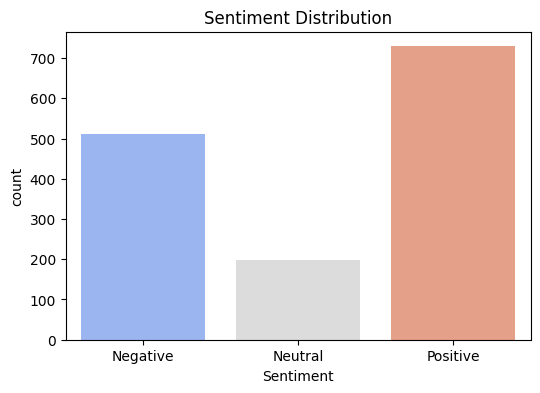

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

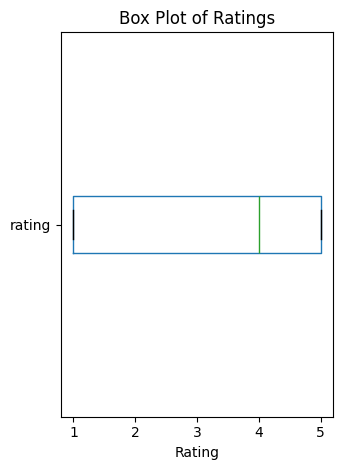

In [ ]:
# Box Plot
plt.subplot(1, 2, 2)
df.boxplot(column='rating', vert=False, grid=False)
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

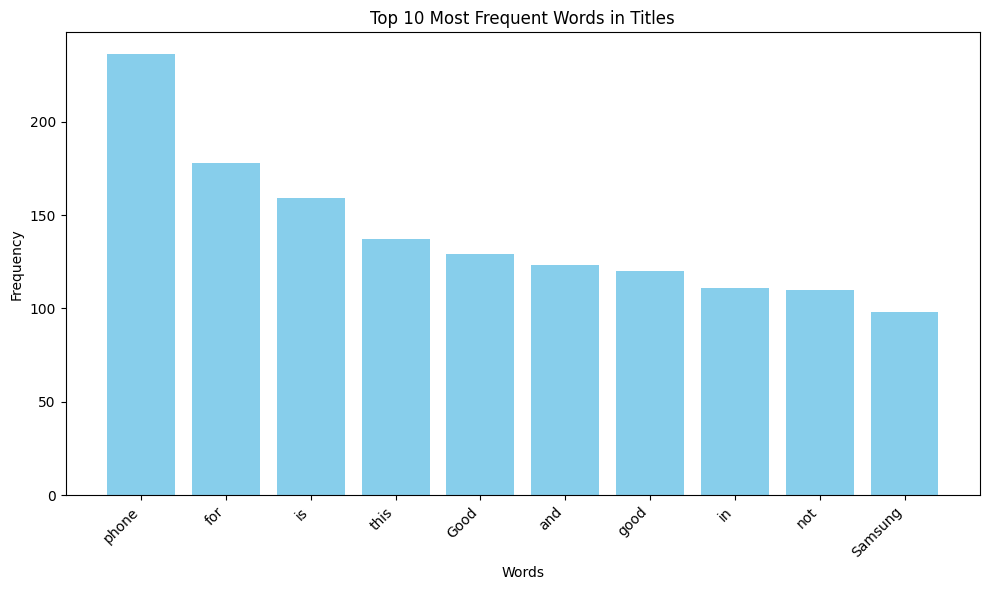

In [ ]:
# 2. Bar chart of top 10 frequent words in titles
word_counts = Counter(" ".join(df['title']).split()).most_common(10)
words, counts = zip(*word_counts)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

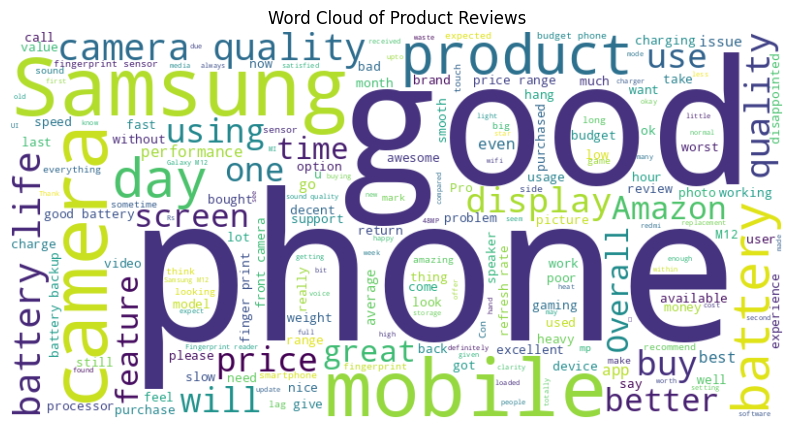

In [ ]:
# 3. Word cloud of the 'body' column,word cloud-display the graphicaly
text = " ".join(df['body'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Reviews')
plt.show()

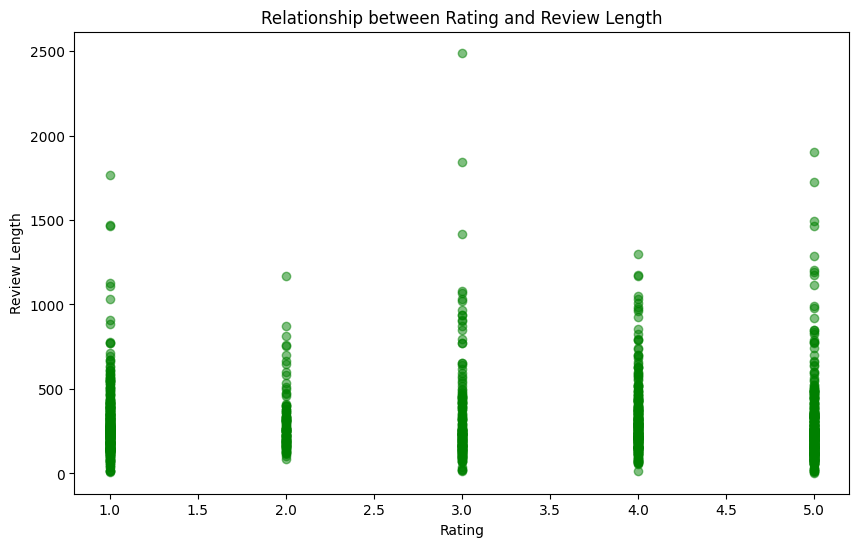

In [ ]:
# 4. Additional visualization: rating vs. review length
df['review_length'] = df['body'].apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['review_length'], alpha=0.5, color='green')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title('Relationship between Rating and Review Length')
plt.show()

# Model Building/ Evaluation

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df.head()

,title,rating,body,Sentiment,review_length
0,Horrible product,1,Very disappointed with the overall performance...,Negative,59
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Neutral,21
2,Overall,4,"Got the mobile on the launch date,Battery must...",Positive,403
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,Negative,377
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Negative,179


In [ ]:
# Example rule: rating >= 4 is positive, <=2 is negative, and drop 3 for neutrality
df['sentiment_1'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df.dropna(subset=['sentiment_1'], inplace=True)

In [ ]:
# Step 1: Installing VADER
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Step 4: Rename columns (if needed) and lowercase
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

text_col = 'body'

# Step 5: Drop missing/blank reviews
df = df.dropna(subset=[text_col])
df = df[df[text_col].str.strip() != ""]

In [ ]:
# Step 6: Use VADER to assign sentiment labels
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'  # optional — you can remove these later if needed

df['sentiment_VADER'] = df[text_col].apply(get_sentiment)

In [ ]:
# Drop neutral if you want binary classification
df = df[df['sentiment_VADER'] != 'neutral']


In [ ]:
#Preparing data for training
X = df[text_col]
y = df['sentiment_VADER']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

**Logistic Regression Model**

In [ ]:
#Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
#Evaluating the model
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.811965811965812
✅ Confusion Matrix:
 [[ 37  39]
 [  5 153]]
✅ Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.49      0.63        76
    positive       0.80      0.97      0.87       158

    accuracy                           0.81       234
   macro avg       0.84      0.73      0.75       234
weighted avg       0.82      0.81      0.79       234



/tmp/ipython-input-56-2472028131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_VADER', palette='coolwarm')


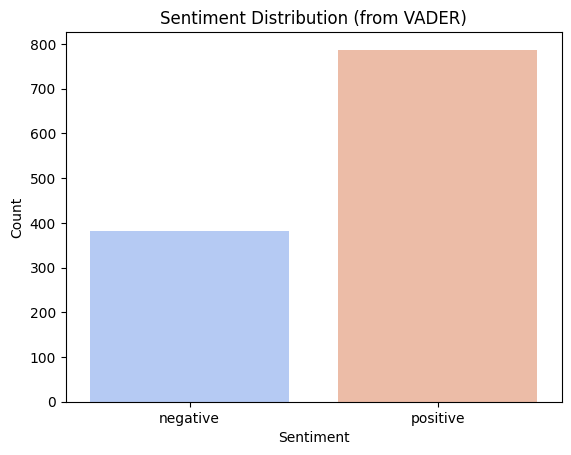

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment_VADER', palette='coolwarm')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title("Sentiment Distribution (from VADER)")
plt.show()

**Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
#Evaluating the model
y_pred = nb_model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7094017094017094
✅ Confusion Matrix:
 [[  8  68]
 [  0 158]]
✅ Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.11      0.19        76
    positive       0.70      1.00      0.82       158

    accuracy                           0.71       234
   macro avg       0.85      0.55      0.51       234
weighted avg       0.80      0.71      0.62       234



**SVM Model**

In [ ]:
from sklearn.svm import SVC

In [ ]:
#SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
#Evaluating the model
y_pred = svm_model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8205128205128205
✅ Confusion Matrix:
 [[ 44  32]
 [ 10 148]]
✅ Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.58      0.68        76
    positive       0.82      0.94      0.88       158

    accuracy                           0.82       234
   macro avg       0.82      0.76      0.78       234
weighted avg       0.82      0.82      0.81       234



**Comparision of the three models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model dictionary
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Evaluation dictionary
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='positive'),
        "Recall": recall_score(y_test, y_pred, pos_label='positive'),
        "F1-Score": f1_score(y_test, y_pred, pos_label='positive')
    })

# Create summary table
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print("\n=== Model Performance Summary ===")
print(results_df.to_string(index=False))


=== Model Performance Summary ===
              Model  Accuracy  Precision   Recall  F1-Score
                SVM  0.820513   0.822222 0.936709  0.875740
Logistic Regression  0.811966   0.796875 0.968354  0.874286
        Naive Bayes  0.709402   0.699115 1.000000  0.822917


SVM gives the best performance on binary sentiment classification with TF-IDF features due to its ability to handle high-dimensional sparse data effectively.

#Plotting ROC Curve for Naive Bayes, SVM, and Logistic Regression

In [ ]:
# Step 1: Import required metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Binarize labels ('positive'=1, 'negative'=0)
y_train_bin = (y_train == 'positive').astype(int)
y_test_bin = (y_test == 'positive').astype(int)


In [ ]:
# Step 3: Refit models if not already done
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

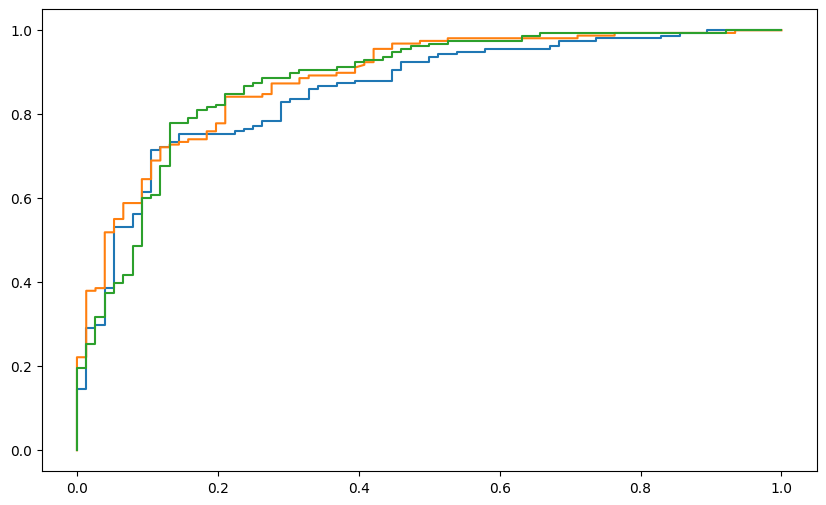

In [ ]:
# Step 4: Plot ROC curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_vec, y_train_bin)

    # Get predicted probabilities for positive class
    y_probs = model.predict_proba(X_test_vec)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_bin, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

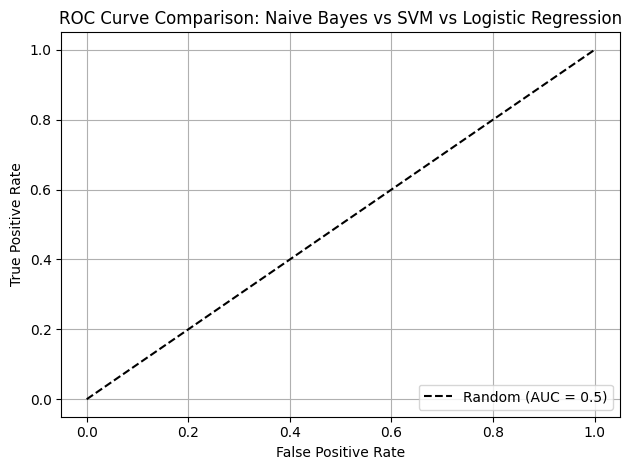

In [ ]:
# Step 5: Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Naive Bayes vs SVM vs Logistic Regression")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Interpretation:

Model	                AUC	      Interpretation

Logistic Regression:	0.92	    (Excellent separation between classes)

SVM:                 	0.91	    (Very strong classifier)

Naive Bayes:        	0.87	    (Decent, but may over-simplify patterns)